# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 45kB/s  eta 0:00:01   47% |███████████████▎                | 7.0MB 28.9MB/s eta 0:00:01    56% |██████████████████▏             | 8.3MB 27.4MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

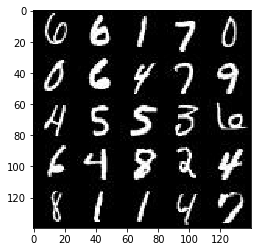

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

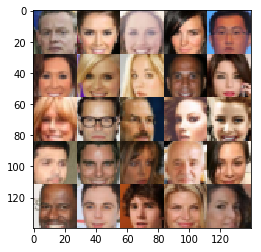

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    
    input_image = tf.placeholder(tf.float32, [None,image_width,image_height,image_channels],name='input')
    z_image = tf.placeholder(tf.float32,[None,z_dim],name = 'z')
    learning_rate = tf.placeholder(tf.float32,name='learn_rate')
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    return input_image, z_image, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    
    with tf.variable_scope('discriminator',reuse=reuse):
        alpha = 0.1
        keep_prob = 0.8
        
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same',activation=None)
        x1 = tf.maximum(alpha*x1,x1)
        
        x2 = tf.layers.conv2d(x1,128,5,strides=2,padding='same',activation=None)
        x2 = tf.layers.batch_normalization(x2,training=True)
        x2 = tf.maximum(alpha*x2,x2)
        x2 = tf.nn.dropout(x2,keep_prob)
        
        x3 = tf.layers.conv2d(x2,256,5,strides=2,padding='same',activation=None)
        x3 = tf.layers.batch_normalization(x3,training=True)
        x3 = tf.maximum(alpha*x3,x3)
        x3 = tf.nn.dropout(x3,keep_prob)
        
        x4 = tf.reshape(x3,(-1,4*4*256))
        logits = tf.layers.dense(x4,1)
        output = tf.sigmoid(logits)
        
        #x2 = tf.batch_normalizaion(x2,training=True)
        #x1 = tf.layers.batch_normalization(x1,)
        
        
        
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    
    
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
   # alpha = 0.1
   # keep_prob = 0.9
    
   # with tf.variable_scope('generator', reuse=not is_train):
    #    g1 = tf.layers.dense(z, 7*7*512)
     #   g1 = tf.reshape(g1, (-1, 7, 7, 512))
      
    """ 
      g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = tf.maximum(alpha * g1, g1)
        # shape = 7x7x512
        
        g2 = tf.layers.conv2d_transpose(g1, 256, 5, strides=2, padding='same', activation=None)
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(alpha * g2, g2)
        g2 = tf.nn.dropout(g2, keep_prob=keep_prob)
        # shape = 14x14x256
        
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, strides=2, padding='same', activation=None)
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(alpha * g3, g3)   
        g3 = tf.nn.dropout(g3, keep_prob=keep_prob)
        # shape = 28x28x128
        
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        # shape = 28x28x5
        
        out = tf.tanh(logits)
        
        return out"""
    
    alpha = 0.01
    keep_prob=0.8
    with tf.variable_scope('generator',reuse=not is_train):
        
        
        x1 = tf.layers.dense(z,7*7*512)
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1,x1)
        
        
        x2 = tf.layers.conv2d_transpose(x1,256,5,strides=2,padding='same',activation=None)
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(x2,x2*alpha)
        x2 = tf.nn.dropout(x2,keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same',activation=None)                  
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(x3,x3*alpha)
        x3 = tf.nn.dropout(x3,keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same',activation=None)
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(x3,x3*alpha)
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,3,strides=1,padding='same',activation=None)
        output = tf.tanh(logits)
        return output
        
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    smooth = 0.1
    
    g_model = generator(input_z,out_channel_dim,is_train=True)
    d_model_real , d_logits_real = discriminator(input_real)
    d_model_fake , d_logits_fake = discriminator(g_model, reuse = True)
    
    g_loss =tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_logits_fake)))
    
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_logits_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    
    d_loss = d_loss_fake + d_loss_real
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator') ]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1).minimize(d_loss, var_list=d_vars)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    
    pe=10
    se=100
    
    input_real , input_z,learn_rate = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss,g_loss = model_loss(input_real,input_z,data_shape[3])
    d_opt , g_opt = model_opt(d_loss,g_loss,learning_rate,beta1)
    
    steps = 0
    
    
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps+=1
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                batch_images = batch_images*2
                _ = sess.run(d_opt,feed_dict={input_real:batch_images,input_z : batch_z,learn_rate:learning_rate})
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,learn_rate:learning_rate})
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,learn_rate:learning_rate})
                if steps % pe == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % se == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

                
                
                # TODO: Train Model
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.0031... Generator Loss: 0.5411
Epoch 1/2... Discriminator Loss: 1.6342... Generator Loss: 0.8476
Epoch 1/2... Discriminator Loss: 1.4039... Generator Loss: 0.9493
Epoch 1/2... Discriminator Loss: 1.6412... Generator Loss: 0.6300
Epoch 1/2... Discriminator Loss: 1.3637... Generator Loss: 0.8519
Epoch 1/2... Discriminator Loss: 1.5143... Generator Loss: 0.9686
Epoch 1/2... Discriminator Loss: 1.5070... Generator Loss: 0.8612
Epoch 1/2... Discriminator Loss: 1.4798... Generator Loss: 1.2285
Epoch 1/2... Discriminator Loss: 1.4350... Generator Loss: 0.9081
Epoch 1/2... Discriminator Loss: 1.3877... Generator Loss: 0.9946


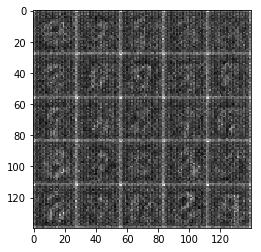

Epoch 1/2... Discriminator Loss: 1.4278... Generator Loss: 0.9093
Epoch 1/2... Discriminator Loss: 1.4170... Generator Loss: 0.9988
Epoch 1/2... Discriminator Loss: 1.4680... Generator Loss: 0.8158
Epoch 1/2... Discriminator Loss: 1.3935... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 1.3890... Generator Loss: 0.8552
Epoch 1/2... Discriminator Loss: 1.3577... Generator Loss: 0.8909
Epoch 1/2... Discriminator Loss: 1.3806... Generator Loss: 1.3543
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 0.8522
Epoch 1/2... Discriminator Loss: 1.4555... Generator Loss: 0.5904
Epoch 1/2... Discriminator Loss: 1.1327... Generator Loss: 1.0946


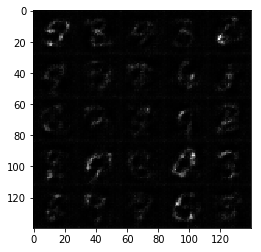

Epoch 1/2... Discriminator Loss: 1.2450... Generator Loss: 0.8273
Epoch 1/2... Discriminator Loss: 1.1605... Generator Loss: 1.0124
Epoch 1/2... Discriminator Loss: 1.1656... Generator Loss: 0.9203
Epoch 1/2... Discriminator Loss: 1.1943... Generator Loss: 1.3694
Epoch 1/2... Discriminator Loss: 1.2026... Generator Loss: 1.0249
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 0.7193
Epoch 1/2... Discriminator Loss: 1.2412... Generator Loss: 0.9888
Epoch 1/2... Discriminator Loss: 1.2375... Generator Loss: 1.2219
Epoch 1/2... Discriminator Loss: 1.5778... Generator Loss: 0.5273
Epoch 1/2... Discriminator Loss: 1.3829... Generator Loss: 1.1401


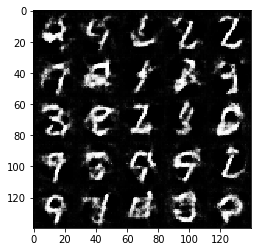

Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.9869
Epoch 1/2... Discriminator Loss: 1.4233... Generator Loss: 0.6630
Epoch 1/2... Discriminator Loss: 1.3373... Generator Loss: 1.1443
Epoch 1/2... Discriminator Loss: 1.3438... Generator Loss: 1.0709
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.9017
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 1.0244
Epoch 1/2... Discriminator Loss: 1.2413... Generator Loss: 0.9816
Epoch 1/2... Discriminator Loss: 1.3089... Generator Loss: 1.1855
Epoch 1/2... Discriminator Loss: 1.3639... Generator Loss: 0.8054
Epoch 1/2... Discriminator Loss: 1.2981... Generator Loss: 0.8564


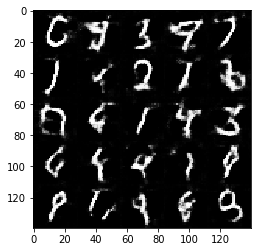

Epoch 1/2... Discriminator Loss: 1.3076... Generator Loss: 0.7636
Epoch 1/2... Discriminator Loss: 1.4243... Generator Loss: 1.2910
Epoch 1/2... Discriminator Loss: 1.3179... Generator Loss: 0.8606
Epoch 1/2... Discriminator Loss: 1.3848... Generator Loss: 1.1114
Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 1.4210... Generator Loss: 0.5687
Epoch 2/2... Discriminator Loss: 1.2457... Generator Loss: 0.8439
Epoch 2/2... Discriminator Loss: 1.3051... Generator Loss: 0.8558
Epoch 2/2... Discriminator Loss: 1.3543... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 1.4417... Generator Loss: 1.2857


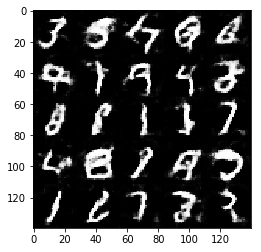

Epoch 2/2... Discriminator Loss: 1.3618... Generator Loss: 0.8360
Epoch 2/2... Discriminator Loss: 1.3287... Generator Loss: 1.4921
Epoch 2/2... Discriminator Loss: 1.3802... Generator Loss: 1.0145
Epoch 2/2... Discriminator Loss: 1.2987... Generator Loss: 0.9712
Epoch 2/2... Discriminator Loss: 1.3299... Generator Loss: 0.7441
Epoch 2/2... Discriminator Loss: 1.3398... Generator Loss: 0.8642
Epoch 2/2... Discriminator Loss: 1.3432... Generator Loss: 0.7948
Epoch 2/2... Discriminator Loss: 1.4314... Generator Loss: 0.6848
Epoch 2/2... Discriminator Loss: 1.3607... Generator Loss: 0.9876
Epoch 2/2... Discriminator Loss: 1.3353... Generator Loss: 0.7930


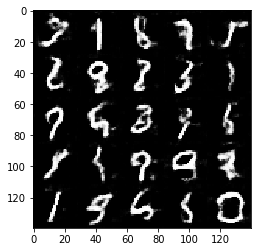

Epoch 2/2... Discriminator Loss: 1.3780... Generator Loss: 0.6771
Epoch 2/2... Discriminator Loss: 1.3010... Generator Loss: 0.9339
Epoch 2/2... Discriminator Loss: 1.3410... Generator Loss: 0.8682
Epoch 2/2... Discriminator Loss: 1.2494... Generator Loss: 0.9162
Epoch 2/2... Discriminator Loss: 1.2955... Generator Loss: 0.9431
Epoch 2/2... Discriminator Loss: 1.3465... Generator Loss: 0.7686
Epoch 2/2... Discriminator Loss: 1.3320... Generator Loss: 0.8877
Epoch 2/2... Discriminator Loss: 1.4221... Generator Loss: 0.7323
Epoch 2/2... Discriminator Loss: 1.2944... Generator Loss: 1.0221
Epoch 2/2... Discriminator Loss: 1.3356... Generator Loss: 0.7315


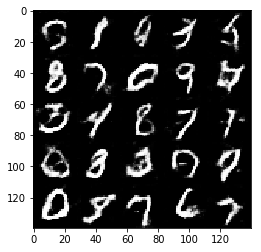

Epoch 2/2... Discriminator Loss: 1.3578... Generator Loss: 0.8361
Epoch 2/2... Discriminator Loss: 1.3081... Generator Loss: 1.0918
Epoch 2/2... Discriminator Loss: 1.2271... Generator Loss: 1.0871
Epoch 2/2... Discriminator Loss: 1.2543... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 1.3247... Generator Loss: 0.9560
Epoch 2/2... Discriminator Loss: 1.2997... Generator Loss: 0.9640
Epoch 2/2... Discriminator Loss: 1.3395... Generator Loss: 1.0751
Epoch 2/2... Discriminator Loss: 1.4027... Generator Loss: 0.7017
Epoch 2/2... Discriminator Loss: 1.4115... Generator Loss: 0.6507
Epoch 2/2... Discriminator Loss: 1.3104... Generator Loss: 1.0239


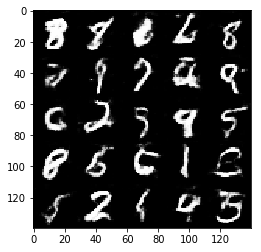

Epoch 2/2... Discriminator Loss: 1.4215... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 1.4278... Generator Loss: 0.5884
Epoch 2/2... Discriminator Loss: 1.3064... Generator Loss: 1.0245
Epoch 2/2... Discriminator Loss: 1.3429... Generator Loss: 0.9695
Epoch 2/2... Discriminator Loss: 1.3702... Generator Loss: 0.7812
Epoch 2/2... Discriminator Loss: 1.3135... Generator Loss: 1.2488
Epoch 2/2... Discriminator Loss: 1.2801... Generator Loss: 0.9982
Epoch 2/2... Discriminator Loss: 1.3053... Generator Loss: 1.0954
Epoch 2/2... Discriminator Loss: 1.2816... Generator Loss: 0.7983
Epoch 2/2... Discriminator Loss: 1.3557... Generator Loss: 0.7494


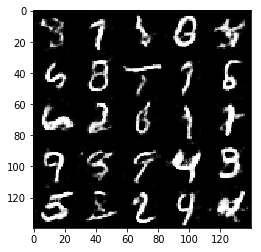

Epoch 2/2... Discriminator Loss: 1.3193... Generator Loss: 0.9245
Epoch 2/2... Discriminator Loss: 1.3297... Generator Loss: 0.9380
Epoch 2/2... Discriminator Loss: 1.4167... Generator Loss: 0.6734


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 7.9247... Generator Loss: 0.0142
Epoch 1/1... Discriminator Loss: 5.5623... Generator Loss: 0.1836
Epoch 1/1... Discriminator Loss: 1.9743... Generator Loss: 8.6872
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 2.7654
Epoch 1/1... Discriminator Loss: 4.2041... Generator Loss: 0.1386
Epoch 1/1... Discriminator Loss: 2.4146... Generator Loss: 3.5432
Epoch 1/1... Discriminator Loss: 2.0040... Generator Loss: 0.2649
Epoch 1/1... Discriminator Loss: 1.5491... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.6994
Epoch 1/1... Discriminator Loss: 1.5356... Generator Loss: 0.7530


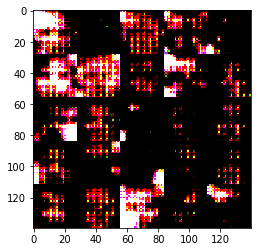

Epoch 1/1... Discriminator Loss: 1.7154... Generator Loss: 0.3384
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.6995... Generator Loss: 0.3751
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.7333
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 1.2909
Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 3.2147
Epoch 1/1... Discriminator Loss: 0.7285... Generator Loss: 1.4261
Epoch 1/1... Discriminator Loss: 0.8013... Generator Loss: 1.3110
Epoch 1/1... Discriminator Loss: 1.6441... Generator Loss: 0.3547
Epoch 1/1... Discriminator Loss: 0.6234... Generator Loss: 2.4326


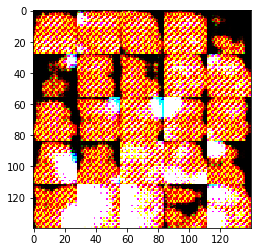

Epoch 1/1... Discriminator Loss: 0.4748... Generator Loss: 2.2118
Epoch 1/1... Discriminator Loss: 3.5342... Generator Loss: 4.1806
Epoch 1/1... Discriminator Loss: 0.5644... Generator Loss: 2.1902
Epoch 1/1... Discriminator Loss: 0.8211... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 1.0192
Epoch 1/1... Discriminator Loss: 1.3254... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 1.2067... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 0.9089... Generator Loss: 1.2374
Epoch 1/1... Discriminator Loss: 2.8812... Generator Loss: 0.1671
Epoch 1/1... Discriminator Loss: 3.0910... Generator Loss: 0.1670


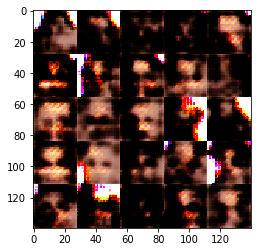

Epoch 1/1... Discriminator Loss: 1.2142... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 3.9079... Generator Loss: 2.1983
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 1.5578... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.4555... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.6077
Epoch 1/1... Discriminator Loss: 1.2181... Generator Loss: 1.0016


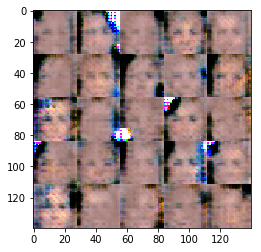

Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.8453
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 1.5927... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 1.5162... Generator Loss: 0.7773
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.6676... Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.6466


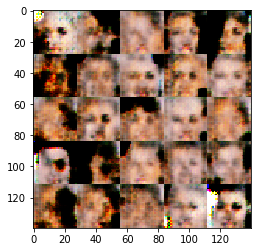

Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 1.1640
Epoch 1/1... Discriminator Loss: 1.6423... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.9138... Generator Loss: 0.3666
Epoch 1/1... Discriminator Loss: 1.7337... Generator Loss: 0.4065
Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 0.7266
Epoch 1/1... Discriminator Loss: 1.4854... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 1.0775
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7347
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.7866


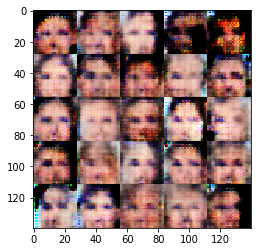

Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.4609... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.8018
Epoch 1/1... Discriminator Loss: 1.5453... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.8646
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.7776


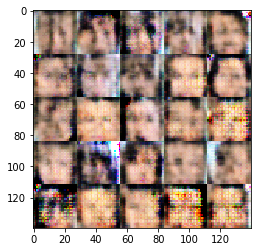

Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.9768
Epoch 1/1... Discriminator Loss: 1.6331... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.8068
Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.5811... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.9320
Epoch 1/1... Discriminator Loss: 1.6080... Generator Loss: 1.0973


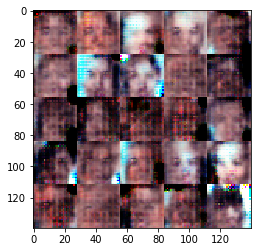

Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.7585... Generator Loss: 0.4532
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.7569
Epoch 1/1... Discriminator Loss: 1.4790... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7815
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.7102


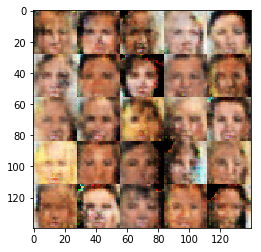

Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.8201
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.4626... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.5649
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.5977... Generator Loss: 0.5234


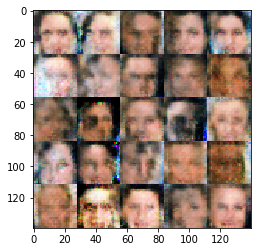

Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.8142
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.7658
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.7611


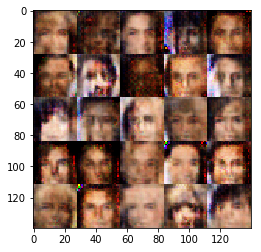

Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.7389
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.7405


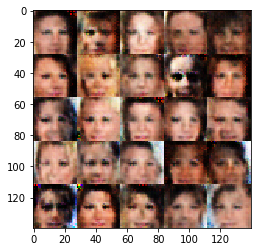

Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.8485
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.7177
Epoch 1/1... Discriminator Loss: 1.5026... Generator Loss: 0.5633
Epoch 1/1... Discriminator Loss: 1.4672... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.7830


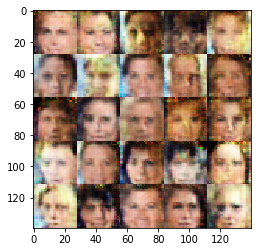

Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.7635
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7145
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.6508


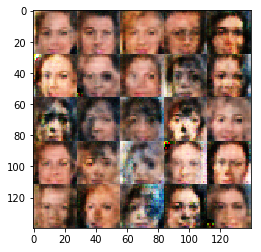

Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.6836
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8390
Epoch 1/1... Discriminator Loss: 1.4419... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.7392
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6915


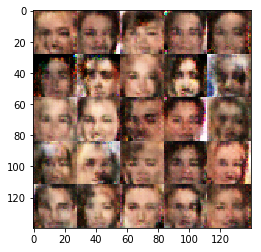

Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.7718
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.4186... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.8276


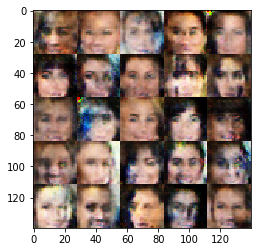

Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.4188... Generator Loss: 0.7601


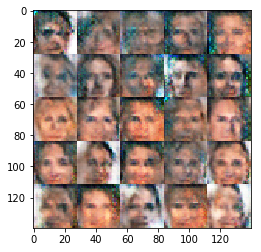

Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.8340
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 1.4148... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.7634
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 1.4438... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.7389


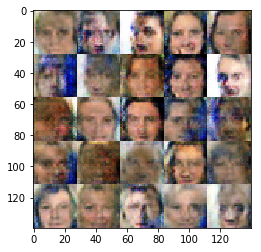

Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.7344
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 1.3912... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.7760


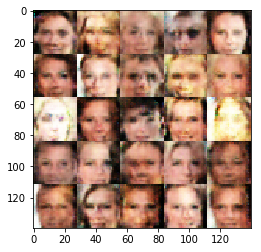

Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.8044
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.4584... Generator Loss: 0.7346
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7503


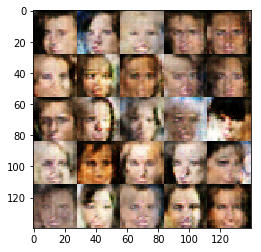

Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.7760
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.8182
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.7176


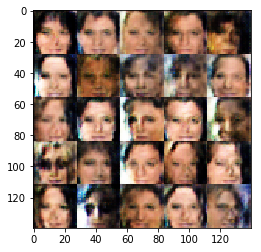

Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.7217
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.7607
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.7937


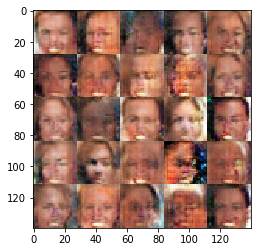

Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.8014
Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.7650
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7773
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.7377


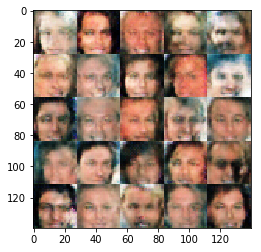

Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7912
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.7792
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.7546


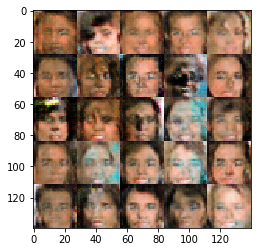

Epoch 1/1... Discriminator Loss: 1.6208... Generator Loss: 1.2385
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.8435
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.7699
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.4767... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 1.4594... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.7686


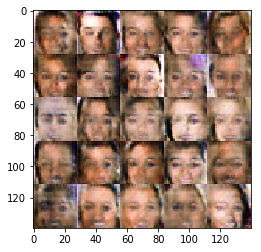

Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.4631... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.7588


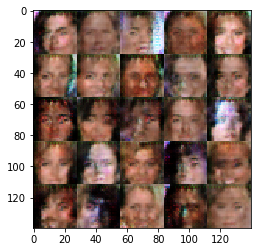

Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.7854
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.7166


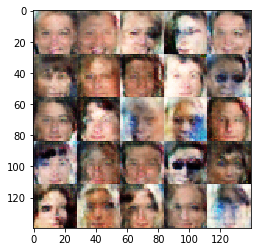

Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.3982... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 1.4374... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.7256
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.6665


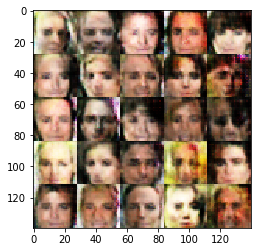

Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.7966
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.7608


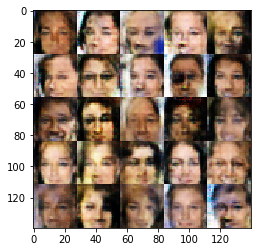

Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.7646
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.8158


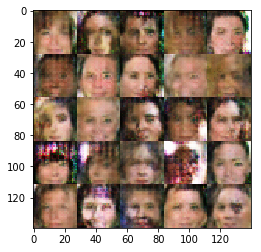

Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.7904


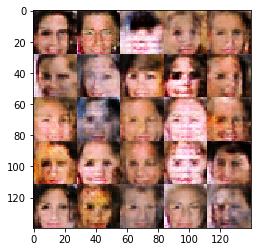

Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.8334
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.7802
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.7535
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.8235


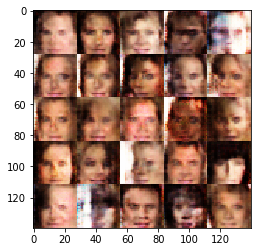

Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.7668
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.7258
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.7773
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.8054


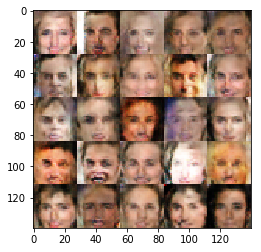

Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.7222
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7650
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.7660


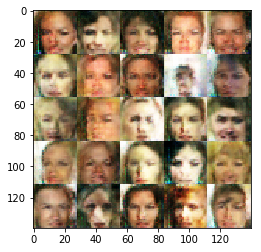

Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.7679
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7425
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.9264


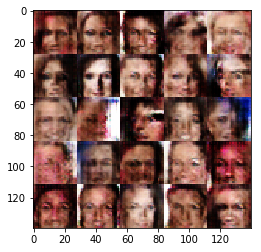

Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7666
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.8460
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.7585


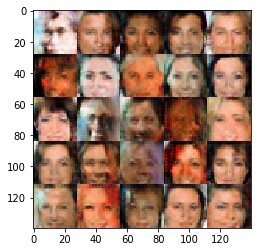

Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.7870
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.8042


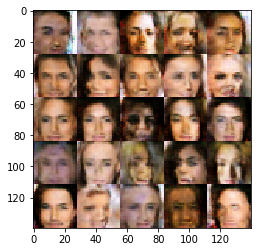

Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.6341
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.8004


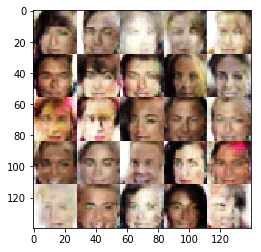

Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.7680
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.7520
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.7499
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.7879


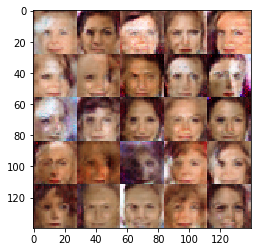

Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7912
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.8051
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.7891
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.8679


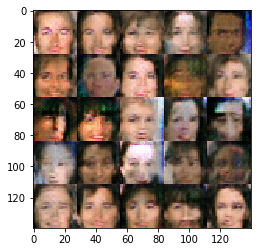

Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7797
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.8269


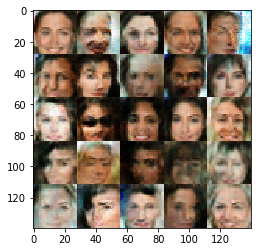

Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.7497
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.6468
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.8681
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.7458


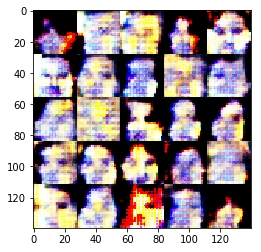

Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.7698
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7970
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7969


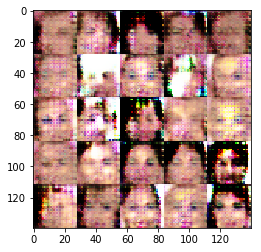

Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.7685
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 1.3939... Generator Loss: 0.7762


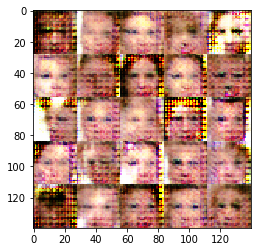

Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7677
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.7773
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.7624
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.8093
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7877


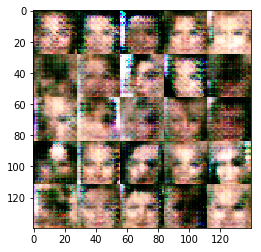

Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.3884... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.7895
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7664


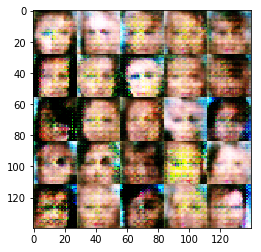

Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.7850
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.8071
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.7833
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.8003


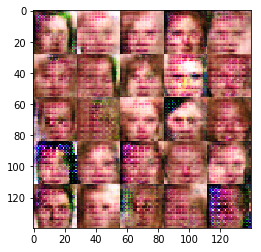

Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.8137
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.7758


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.01
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.